# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [6]:
#env.close()
env_info = env.reset(train_mode=False)[brain_name] # reset the environment

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
import os
import time
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from collections import deque
from dqn_agent import Agent

In [8]:
seed = 0

In [9]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 37
The state for the first agent looks like: [0.         0.         1.         0.         0.53088671 0.
 0.         1.         0.         0.10077096 0.         1.
 0.         0.         0.63564986 1.         0.         0.
 0.         0.14294983 0.         0.         1.         0.
 0.69379312 0.         0.         1.         0.         0.73422182
 0.         0.         1.         0.         0.09551248 0.
 0.        ]


In [10]:
#Create Agent
#agent = Agent(state_size=state_size, action_size=action_size, n_agents=num_agents, seed=seed)
agent = Agent(state_size=state_size, action_size=action_size, seed=seed)

In [11]:
def dqn(n_episodes = 1000, max_t = 1200, eps_start = 1.0, eps_end = 0.01, eps_decay = 0.995, print_interval=10):
    scores = []                     #list containing scores from each episode
    scores_window = deque(maxlen = 100) # last hundred scores
    eps = eps_start  #Initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_window.append(score)
        scores.append(score)
        eps = max(eps_end, eps_decay*eps)
        print("\rEpisode {}\tAverage Score: {:.2f}".format(i_episode, np.mean(scores_window)), end ="")
        if i_episode % print_interval == 0:
            print("\rEpisode {}\tAverage Score: {:.2f}".format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window) >= 15.0:
            print("\nEnvironment solved in {:d} episodes!\t Average score: {:.2f}".format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

In [12]:
%%time
scores = dqn(n_episodes = 1000, max_t = 1200, eps_start = 1.0, eps_end = 0.01, eps_decay = 0.995, print_interval=10)

Episode 10	Average Score: -0.20
Episode 20	Average Score: -0.25
Episode 30	Average Score: -0.33
Episode 40	Average Score: -0.20
Episode 50	Average Score: 0.084
Episode 60	Average Score: 0.32
Episode 70	Average Score: 0.59
Episode 80	Average Score: 0.75
Episode 90	Average Score: 0.84
Episode 100	Average Score: 1.01
Episode 110	Average Score: 1.29
Episode 120	Average Score: 1.71
Episode 130	Average Score: 2.03
Episode 140	Average Score: 2.39
Episode 150	Average Score: 2.68
Episode 160	Average Score: 3.02
Episode 170	Average Score: 3.24
Episode 180	Average Score: 3.54
Episode 190	Average Score: 4.07
Episode 200	Average Score: 4.50
Episode 210	Average Score: 4.85
Episode 220	Average Score: 5.04
Episode 230	Average Score: 5.36
Episode 240	Average Score: 5.72
Episode 250	Average Score: 6.16
Episode 260	Average Score: 6.39
Episode 270	Average Score: 6.92
Episode 280	Average Score: 7.29
Episode 290	Average Score: 7.51
Episode 300	Average Score: 7.62
Episode 310	Average Score: 7.90
Episode 320	

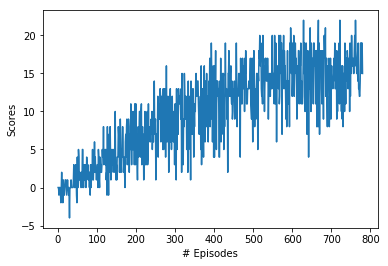

In [13]:
plt.figure()
plt.plot(range(1, len(scores) + 1), scores)
plt.xlabel('# Episodes')
plt.ylabel('Scores')
plt.savefig('scores_plot.png')
plt.show()

In [14]:
#Load a trained agent
agent.qnetwork_local.load_state_dict(torch.load("checkpoint.pth"))

for i in range(5):
    env_info = env.reset(train_mode=False)[brain_name]
    state = env_info.vector_observations[0]
    score = 0
    for j in range(1000):
        action = agent.act(state)
        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations[0]
        reward = env_info.rewards[0]
        done = env_info.local_done[0]
        agent.step(state, action, reward, next_state, done)
        state = next_state
        score += reward
        if done:
            break

    print("\rEpisode {}\t Score: {:.2f}".format(i+1, score))

Episode 1	 Score: 15.00
Episode 2	 Score: 13.00
Episode 3	 Score: 7.00
Episode 4	 Score: 15.00
Episode 5	 Score: 19.00


In [15]:
env.close()